In [9]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


train = pd.read_csv('resources/length_weight.csv')
train_y = train.pop('weight') 
train_x = torch.tensor(train.to_numpy(), dtype=torch.double).reshape(-1, 1)
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.double).reshape(-1, 1)

In [10]:
class LinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.1]], requires_grad=True, dtype=torch.double)
        self.b = torch.tensor([[0.1]], requires_grad=True, dtype=torch.double)
    # Predictor
    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x),y)

In [11]:
model = LinearRegressionModel()

optimizer = torch.optim.SGD([model.W, model.b], lr = 0.0001)

epochs = 50000
for e in range(epochs):
    model.loss(train_x, train_y).backward() # calculates al derivatives
    optimizer.step() # weights updated

    optimizer.zero_grad() # gradients set to zero
    if e % 10000 == 0:
            loss, current = model.loss(train_x, train_y).item(), e * len(train_x)
            print(f"loss: {loss:>7f}")

print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(train_x, train_y)))

loss: 5.911920
loss: 4.260308
loss: 3.619690
loss: 3.104724
loss: 2.690765
W = tensor([[0.1788]], dtype=torch.float64, requires_grad=True), b = tensor([[-3.5285]], dtype=torch.float64, requires_grad=True), loss = tensor(2.3580, dtype=torch.float64, grad_fn=<MseLossBackward0>)


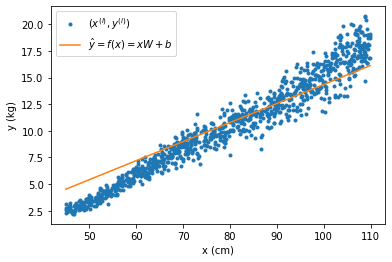

In [12]:
plt.plot(train_x, train_y, '.', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x (cm)')
plt.ylabel('y (kg)')
x = torch.tensor([[torch.min(train_x)], [torch.max(train_x)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(15.5, 8.5, forward = True)
plt.legend()
plt.show()